In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
tqdm.pandas()
%matplotlib inline

RANDOM_SEED = 42

# Import Data

In [3]:
df = pd.read_csv("fraud_detection_train.csv")
df.head()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,...,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   kdkc           200217 non-null  int64 
 2   dati2          200217 non-null  int64 
 3   typeppk        200217 non-null  object
 4   jkpst          200217 non-null  object
 5   umur           200217 non-null  int64 
 6   jnspelsep      200217 non-null  int64 
 7   los            200217 non-null  int64 
 8   cmg            200217 non-null  object
 9   severitylevel  200217 non-null  int64 
 10  diagprimer     200217 non-null  object
 11  dx2_a00_b99    200217 non-null  int64 
 12  dx2_c00_d48    200217 non-null  int64 
 13  dx2_d50_d89    200217 non-null  int64 
 14  dx2_e00_e90    200217 non-null  int64 
 15  dx2_f00_f99    200217 non-null  int64 
 16  dx2_g00_g99    200217 non-null  int64 
 17  dx2_h00_h59    200217 non-null  int64 
 18  dx2_

In [5]:
df.nunique()

visit_id         200217
kdkc                126
dati2               486
typeppk              25
jkpst                 2
umur                105
jnspelsep             2
los                 142
cmg                  23
severitylevel         4
diagprimer           21
dx2_a00_b99           5
dx2_c00_d48           4
dx2_d50_d89           4
dx2_e00_e90           7
dx2_f00_f99           3
dx2_g00_g99           5
dx2_h00_h59           5
dx2_h60_h95           4
dx2_i00_i99           7
dx2_j00_j99           5
dx2_koo_k93           1
dx2_l00_l99           4
dx2_m00_m99           4
dx2_n00_n99           5
dx2_o00_o99           7
dx2_p00_p96          14
dx2_q00_q99           7
dx2_r00_r99           5
dx2_s00_t98           8
dx2_u00_u99           1
dx2_v01_y98           3
dx2_z00_z99           6
proc00_13             5
proc14_23             6
proc24_27             4
proc28_28             3
proc29_31             3
proc_32_38            6
proc39_45             5
proc46_51             4
proc52_57       

# EDA

## Quick peak

In [6]:
# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Hitung korelasi dengan 'label'
correlation_with_label = df_numeric.corr()["label"]

# Tampilkan hasil
print(correlation_with_label)


visit_id        -0.866024
kdkc             0.013042
dati2            0.026380
umur             0.013498
jnspelsep        0.053215
los             -0.040318
severitylevel   -0.018313
dx2_a00_b99      0.008506
dx2_c00_d48      0.011850
dx2_d50_d89     -0.005819
dx2_e00_e90     -0.018964
dx2_f00_f99     -0.005694
dx2_g00_g99     -0.012481
dx2_h00_h59      0.015285
dx2_h60_h95     -0.016075
dx2_i00_i99     -0.013802
dx2_j00_j99      0.003483
dx2_koo_k93           NaN
dx2_l00_l99     -0.005415
dx2_m00_m99     -0.007425
dx2_n00_n99      0.017483
dx2_o00_o99     -0.014471
dx2_p00_p96     -0.025569
dx2_q00_q99     -0.009166
dx2_r00_r99      0.003190
dx2_s00_t98      0.021376
dx2_u00_u99           NaN
dx2_v01_y98     -0.011616
dx2_z00_z99     -0.023549
proc00_13        0.009805
proc14_23        0.002370
proc24_27       -0.003512
proc28_28       -0.007990
proc29_31        0.013702
proc_32_38      -0.011189
proc39_45       -0.043502
proc46_51       -0.026325
proc52_57        0.004352
proc58_62   

In [7]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

correlation_with_label = df_encoded.corr()["label"]
print(correlation_with_label)


visit_id        -0.866024
kdkc             0.013042
dati2            0.026380
typeppk         -0.057364
jkpst           -0.009326
umur             0.013498
jnspelsep        0.053215
los             -0.040318
cmg             -0.004789
severitylevel   -0.018313
diagprimer      -0.000978
dx2_a00_b99      0.008506
dx2_c00_d48      0.011850
dx2_d50_d89     -0.005819
dx2_e00_e90     -0.018964
dx2_f00_f99     -0.005694
dx2_g00_g99     -0.012481
dx2_h00_h59      0.015285
dx2_h60_h95     -0.016075
dx2_i00_i99     -0.013802
dx2_j00_j99      0.003483
dx2_koo_k93           NaN
dx2_l00_l99     -0.005415
dx2_m00_m99     -0.007425
dx2_n00_n99      0.017483
dx2_o00_o99     -0.014471
dx2_p00_p96     -0.025569
dx2_q00_q99     -0.009166
dx2_r00_r99      0.003190
dx2_s00_t98      0.021376
dx2_u00_u99           NaN
dx2_v01_y98     -0.011616
dx2_z00_z99     -0.023549
proc00_13        0.009805
proc14_23        0.002370
proc24_27       -0.003512
proc28_28       -0.007990
proc29_31        0.013702
proc_32_38  

In [ ]:
# Pilih hanya kolom numerik dari df
df_numeric = df.select_dtypes(include=['number'])

# Hitung korelasi semua kolom numerik terhadap kolom 'label'
correlation_with_label = df_numeric.corr()["label"]

# Tampilkan hasil korelasi
print(correlation_with_label)


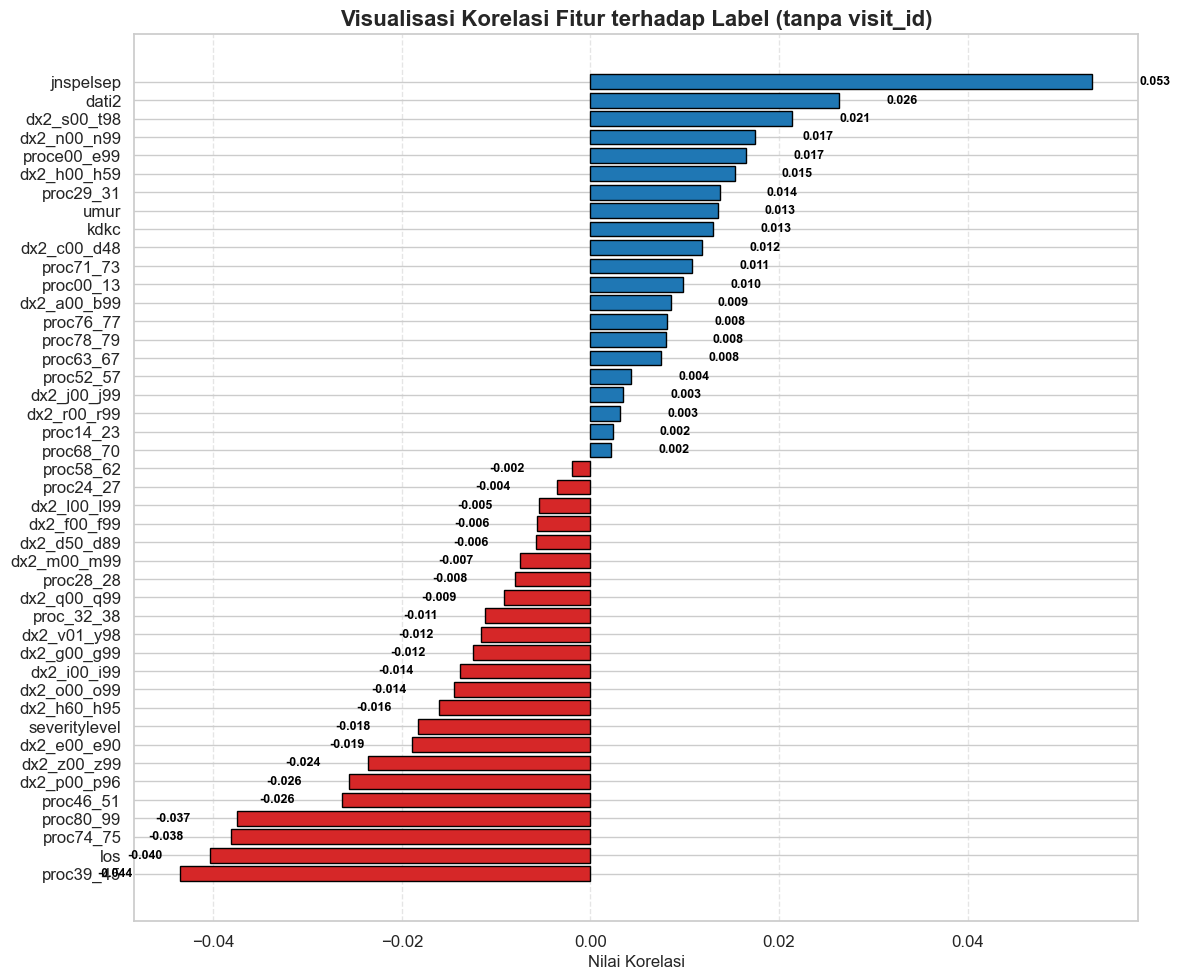

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pilih kolom numerik dan buang visit_id
df_numeric = df.select_dtypes(include=['number']).drop(columns=['visit_id'], errors='ignore')

# Hitung korelasi terhadap label, buang NaN atau infinite jika ada
correlation_with_label = df_numeric.corr()["label"].drop("label").dropna()
correlation_with_label = correlation_with_label[np.isfinite(correlation_with_label)]
correlation_sorted = correlation_with_label.sort_values()

# Buat warna: biru untuk positif, merah untuk negatif
colors = ['#1f77b4' if val >= 0 else '#d62728' for val in correlation_sorted.values]

# Gambar diagram
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid", font_scale=1.1)
bars = plt.barh(correlation_sorted.index, correlation_sorted.values, color=colors, edgecolor='black')

# Tambahkan label nilai secara rapi di samping bar
for bar in bars:
    width = bar.get_width()
    if np.isfinite(width):
        plt.text(x=width + 0.005 if width >= 0 else width - 0.005,
                 y=bar.get_y() + bar.get_height()/2,
                 s=f'{width:.3f}',
                 va='center',
                 ha='left' if width >= 0 else 'right',
                 fontsize=9,
                 fontweight='bold',
                 color='black')

# Judul dan sumbu
plt.title("Visualisasi Korelasi Fitur terhadap Label (tanpa visit_id)", fontsize=16, weight='bold')
plt.xlabel("Nilai Korelasi", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
df.corr()["label"]

C:\Users\LENOVO X390\AppData\Local\Temp\ipykernel_28004\2785776233.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.umur, ax=ax1)
C:\Users\LENOVO X390\AppData\Local\Temp\ipykernel_28004\2785776233.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.los, ax=ax2)


<Axes: xlabel='los', ylabel='Density'>

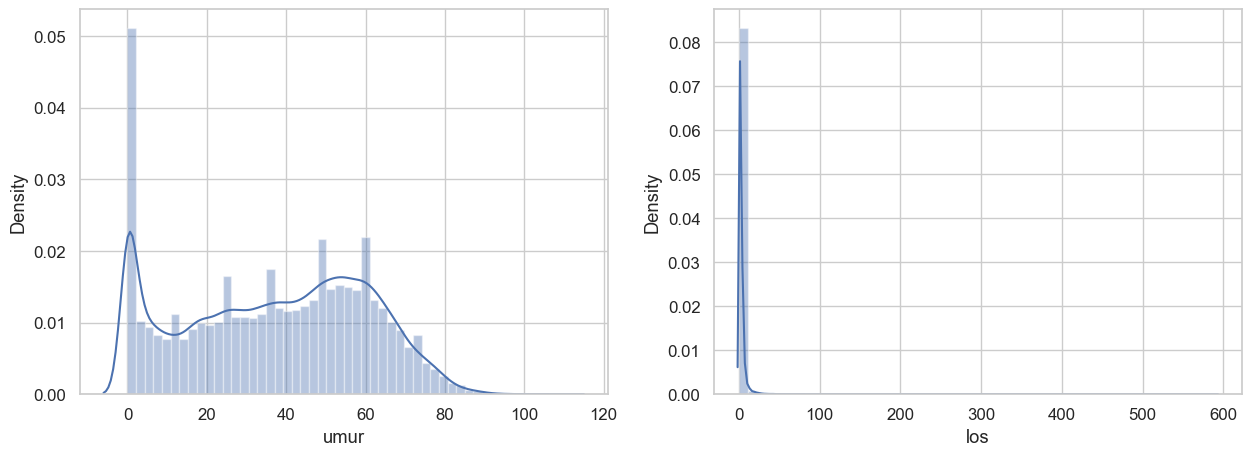

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df.umur, ax=ax1)
sns.distplot(df.los, ax=ax2)

C:\Users\LENOVO X390\AppData\Local\Temp\ipykernel_28004\3022080583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.jnspelsep, ax=ax1)
C:\Users\LENOVO X390\AppData\Local\Temp\ipykernel_28004\3022080583.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.severitylevel, ax=ax2)


<Axes: xlabel='severitylevel', ylabel='Density'>

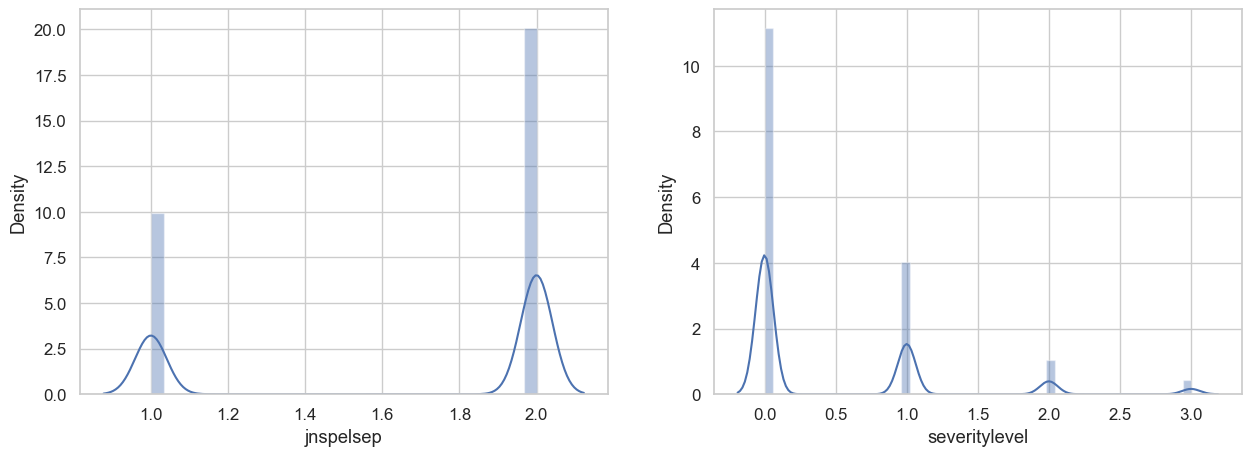

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df.jnspelsep, ax=ax1)
sns.distplot(df.severitylevel, ax=ax2)

In [14]:
imp = []
for col in df.columns.tolist():
    nunique = df[col].nunique()
    print(f"{col} : {nunique}")
    if nunique > 1 and nunique != df.shape[0]:
        imp.append(col)

visit_id : 200217
kdkc : 126
dati2 : 486
typeppk : 25
jkpst : 2
umur : 105
jnspelsep : 2
los : 142
cmg : 23
severitylevel : 4
diagprimer : 21
dx2_a00_b99 : 5
dx2_c00_d48 : 4
dx2_d50_d89 : 4
dx2_e00_e90 : 7
dx2_f00_f99 : 3
dx2_g00_g99 : 5
dx2_h00_h59 : 5
dx2_h60_h95 : 4
dx2_i00_i99 : 7
dx2_j00_j99 : 5
dx2_koo_k93 : 1
dx2_l00_l99 : 4
dx2_m00_m99 : 4
dx2_n00_n99 : 5
dx2_o00_o99 : 7
dx2_p00_p96 : 14
dx2_q00_q99 : 7
dx2_r00_r99 : 5
dx2_s00_t98 : 8
dx2_u00_u99 : 1
dx2_v01_y98 : 3
dx2_z00_z99 : 6
proc00_13 : 5
proc14_23 : 6
proc24_27 : 4
proc28_28 : 3
proc29_31 : 3
proc_32_38 : 6
proc39_45 : 5
proc46_51 : 4
proc52_57 : 6
proc58_62 : 4
proc63_67 : 4
proc68_70 : 3
proc71_73 : 5
proc74_75 : 5
proc76_77 : 4
proc78_79 : 7
proc80_99 : 22
proce00_e99 : 2
procv00_v89 : 1
label : 2


In [15]:
df2 = df[imp].copy()
df2["los_log"] = np.log(df2.los + 2)

C:\Users\LENOVO X390\AppData\Local\Temp\ipykernel_28004\1522345266.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.los_log)


<Axes: xlabel='los_log', ylabel='Density'>

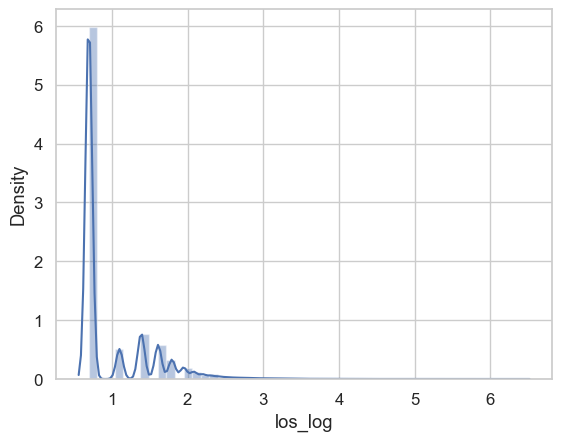

In [16]:
sns.distplot(df2.los_log)

C:\Users\LENOVO X390\AppData\Local\Temp\ipykernel_28004\2181607750.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2.los_log > 3].los_log, ax=ax1)
C:\Users\LENOVO X390\AppData\Local\Temp\ipykernel_28004\2181607750.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[df2.los_log < 3]

<Axes: xlabel='los_log', ylabel='Density'>

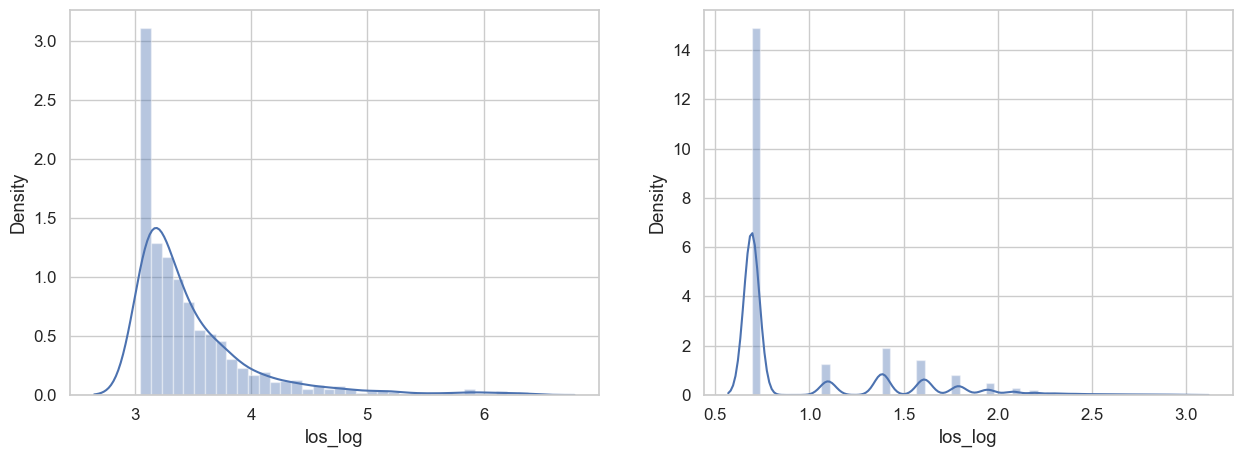

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df2[df2.los_log > 3].los_log, ax=ax1)
sns.distplot(df2[df2.los_log < 3].los_log, ax=ax2)

In [18]:
df2.drop(df2[(df2.los > 40)].index, inplace=True)
df2.shape

(199980, 50)

In [19]:
df2[(df2.umur > 90)].label.value_counts()

label
0    59
1    55
Name: count, dtype: int64

C:\Users\LENOVO X390\AppData\Local\Temp\ipykernel_28004\3439214853.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[(df2.umur < 90)].umur)


<Axes: xlabel='umur', ylabel='Density'>

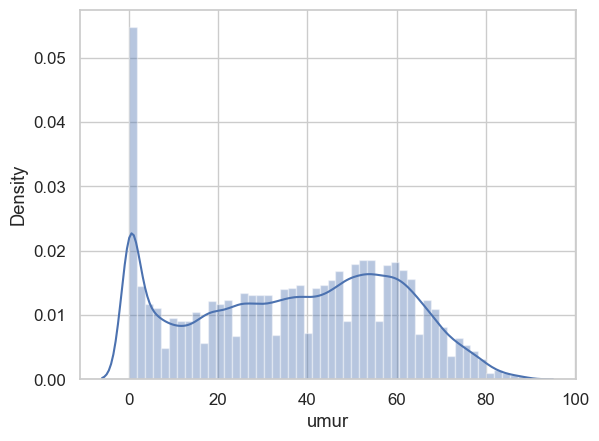

In [20]:
sns.distplot(df2[(df2.umur < 90)].umur)

In [21]:
df2[(df2.los==0) & (df2.jnspelsep == 1) ].label.value_counts()

label
1    1795
0     521
Name: count, dtype: int64

In [ ]:
# df2.drop(df2[(df2.los==0) & (df2.label==0) & (df2.jnspelsep == 1)].index, inplace=True)
# df2.shape

# Feature Engineering

In [22]:
proc_cols = [col for col in df2.columns if "proc" in col]
proc_cols

['proc00_13',
 'proc14_23',
 'proc24_27',
 'proc28_28',
 'proc29_31',
 'proc_32_38',
 'proc39_45',
 'proc46_51',
 'proc52_57',
 'proc58_62',
 'proc63_67',
 'proc68_70',
 'proc71_73',
 'proc74_75',
 'proc76_77',
 'proc78_79',
 'proc80_99',
 'proce00_e99']

In [23]:
dx2_cols = [col for col in df2.columns if "dx2" in col]
dx2_cols

['dx2_a00_b99',
 'dx2_c00_d48',
 'dx2_d50_d89',
 'dx2_e00_e90',
 'dx2_f00_f99',
 'dx2_g00_g99',
 'dx2_h00_h59',
 'dx2_h60_h95',
 'dx2_i00_i99',
 'dx2_j00_j99',
 'dx2_l00_l99',
 'dx2_m00_m99',
 'dx2_n00_n99',
 'dx2_o00_o99',
 'dx2_p00_p96',
 'dx2_q00_q99',
 'dx2_r00_r99',
 'dx2_s00_t98',
 'dx2_v01_y98',
 'dx2_z00_z99']

In [24]:
def count_dx2(row):
    count = 0
    for col in dx2_cols:
        count += 1 if row[col] > 0 else 0

    row["count_dx2"] = count
    return row

def count_proc(row):
    count = 0
    for col in proc_cols:
        count += 1 if row[col] > 0 else 0

    row["count_proc"] = count
    return row

In [25]:
# 1) Masa Balita: 0–5 Tahun;
# 2) Masa Kanak-Kanak: 5–11 Tahun;
# 3) Masa Remaja Awal: 12–16 Tahun; 
# 4) Masa Remaja Akhir: 17–25 Tahun;
# 5) Masa Dewasa Awal: 26–35 Tahun;
# 6) Masa Dewasa Akhir: 36–45 Tahun;
# 7) Masa Lansia Awal: 46–55 Tahun; 
# 8) Masa Lansia Akhir: 56–65 Tahun; dan 
# 9) Masa Manula: > 65 Tahun.
    
def encode_umur(x):
    if x.umur <= 5:
        x['encode_umur'] = 1
    elif x.umur <= 11:
        x['encode_umur'] = 2
    elif x.umur <= 16:
        x['encode_umur'] = 3
    elif x.umur <= 25:
        x['encode_umur'] = 4
    elif x.umur <= 35:
        x['encode_umur'] = 5
    elif x.umur <= 45:
        x['encode_umur'] = 6
    elif x.umur <= 55:
        x['encode_umur'] = 7
    elif x.umur <= 65:
        x['encode_umur'] = 8
    else:
        x['encode_umur'] = 9

    return x


In [26]:
def concat_dati2_kdkc(row):
    row["dati2_kdkc"] = str(row["dati2"]) + "_" + str(row["kdkc"])
    return row

In [27]:
def is_baby(row):
    row["is_baby"] = 1 if row.umur == 0 else 0
    return row

In [28]:
def apply_row(row):
    row = concat_dati2_kdkc(row)
#     row = is_baby(row)
    return row

In [29]:
tempdf = df2.apply(lambda x: apply_row(x), axis=1)

In [30]:
df2 = tempdf.copy()

In [31]:
df2[df2.label==1].dati2_kdkc.value_counts()

dati2_kdkc
221_1018    2442
217_1301    2183
90_601      2062
173_1101    1893
116_905     1806
            ... 
458_105        3
361_2401       3
452_2404       2
419_2503       2
524_1901       2
Name: count, Length: 485, dtype: int64

In [32]:
df2["count_proc"] = 0
for col in proc_cols:
    df2["count_proc"] += df2[col]

In [33]:
df2["count_dx2"] = 0
for col in dx2_cols:
    df2["count_dx2"] += df2[col]

In [34]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split, cross_validate

In [35]:
drop_cols = ["los", "jnspelsep", "jkpst", "kdkc"]
astype_dict = {"dati2": "object", "severitylevel": "object"}

In [36]:
X = df2.drop(["label"] + drop_cols + proc_cols + dx2_cols, axis=1)
y = df2.label.copy()

X = X.astype(astype_dict)
# X = pd.get_dummies(X)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, stratify=y, random_state=42)

In [38]:
# X["proc_dx2"] = X.count_proc - X.count_dx2
# X = X.drop(["count_proc", "count_dx2"], axis=1)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199980 entries, 0 to 200216
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   dati2          199980 non-null  object 
 1   typeppk        199980 non-null  object 
 2   umur           199980 non-null  int64  
 3   cmg            199980 non-null  object 
 4   severitylevel  199980 non-null  object 
 5   diagprimer     199980 non-null  object 
 6   los_log        199980 non-null  float64
 7   dati2_kdkc     199980 non-null  object 
 8   count_proc     199980 non-null  int64  
 9   count_dx2      199980 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 16.8+ MB


In [40]:
from sklearn.metrics import classification_report

# Model Predict

In [44]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()

# Encode semua kolom bertipe object
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))


In [45]:
score = cross_validate(xgb, X_encoded, y, scoring=scoring, cv=cv, n_jobs=-1)

In [46]:
from xgboost import XGBClassifier

 param = {
     'bootstrap': True,
     'max_depth': 50,
     'max_features': 6,
     'min_samples_leaf': 4,
     'min_samples_split': 12
 }

 xgb = XGBClassifier(random_state=42, **param)
 scoring = ['precision', 'recall', 'f1', 'accuracy']
 cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
 score = cross_validate(xgb, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)

 print(score)

IndentationError: unexpected indent (1275889632.py, line 3)

In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder

# Preprocessing: Label Encoding kolom object
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# Inisialisasi parameter (tanpa indentasi aneh)
param = {
    'max_depth': 10,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Inisialisasi model
xgb = XGBClassifier(random_state=42, **param)

# Skor yang dievaluasi
scoring = ['precision', 'recall', 'f1', 'accuracy']

# Cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)

# Evaluasi model
score = cross_validate(xgb, X_encoded, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)

# Tampilkan hasil
print(score)


{'fit_time': array([10.56926107,  9.66540098,  9.89417815, 10.55231667,  9.82206583,
       10.78121114, 10.44692564,  9.9687202 ,  5.91782951,  5.92730165]), 'score_time': array([0.74634457, 0.75261402, 0.86011314, 0.7384367 , 0.8161068 ,
       0.67513728, 0.75947332, 0.8255465 , 0.40878868, 0.37396431]), 'test_precision': array([0.71347071, 0.70670765, 0.712155  , 0.71210838, 0.71289274,
       0.71420784, 0.71315776, 0.71394065, 0.71312249, 0.71386124]), 'test_recall': array([0.72401058, 0.71146936, 0.71730884, 0.71356558, 0.7224995 ,
       0.71926935, 0.71226792, 0.72284887, 0.71685965, 0.71945498]), 'test_f1': array([0.71870201, 0.70908051, 0.71472263, 0.71283624, 0.71766397,
       0.71672966, 0.71271256, 0.71836714, 0.71498619, 0.71664719]), 'test_accuracy': array([0.71607161, 0.70754575, 0.71314631, 0.7119962 , 0.71522152,
       0.71517152, 0.71234623, 0.71607161, 0.71369637, 0.7149965 ])}


In [49]:
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder

# Preprocessing: Label Encoding kolom object
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# Inisialisasi parameter (tanpa indentasi aneh)
param = {
    'max_depth': 10,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Inisialisasi model
xgb = XGBClassifier(random_state=42, **param)

# Skor yang dievaluasi
scoring = ['precision', 'recall', 'f1', 'accuracy']

# Cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=42)

# Evaluasi model
score = cross_validate(xgb, X_encoded, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)

# Tampilkan hasil
print(score)


{'fit_time': array([11.66389942, 13.04856491, 12.65838766, 14.01894927, 12.34784746,
       12.51038289, 12.76035404, 12.92108297, 11.75916433, 13.91636109,
       11.48381042, 13.61484194, 12.60006714, 12.11634684, 15.49316621,
       11.58163357, 14.01792026, 16.2004106 , 15.77965236, 14.64720798,
       14.20019126, 14.21404767, 15.47922611, 14.69046378, 14.75745797,
       14.73859501, 14.69942594, 13.6531179 , 14.32463336, 13.93133378,
       14.09924912, 13.16564941, 12.42514706, 11.7608583 , 12.33093834,
       11.96789861, 11.56583238, 12.67742562, 11.97669172, 11.52418423]), 'score_time': array([0.47900224, 0.49910593, 0.61520362, 0.52116871, 0.67389345,
       0.53382015, 0.52912307, 0.44596148, 0.82084846, 0.56110477,
       0.54789996, 0.57131743, 0.50183654, 0.47526145, 0.81416726,
       0.57324052, 0.52847195, 0.62037849, 0.72211576, 0.58052969,
       0.57334852, 0.56523395, 0.75969815, 0.62087512, 0.56390548,
       0.5638845 , 0.54540777, 0.58508801, 0.51036501, 0.549

In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder

# Muat data
df = pd.read_csv("fraud_detection_train.csv")  # sesuaikan path jika perlu
X = df.drop(columns=['label', 'visit_id'])
y = df['label']

# Encoding untuk kolom object
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Model Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

# Setup cross-validation dan evaluasi
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
scoring = ['precision', 'recall', 'f1', 'accuracy']
rf_score = cross_validate(rf_model, X, y, scoring=scoring, cv=cv, n_jobs=-1)

# Hasil ke DataFrame
rf_results = pd.DataFrame({
    'Precision': rf_score['test_precision'],
    'Recall': rf_score['test_recall'],
    'F1-Score': rf_score['test_f1'],
    'Accuracy': rf_score['test_accuracy']
})
rf_results.loc['Rata-rata'] = rf_results.mean()

# Tampilkan
print(rf_results)


           Precision    Recall  F1-Score  Accuracy
0           0.681777  0.714827  0.697911  0.690141
1           0.678037  0.699915  0.688802  0.683323
2           0.681981  0.702558  0.692117  0.687011
3           0.677517  0.694479  0.685893  0.681492
4           0.679872  0.699267  0.689433  0.684539
5           0.680570  0.703107  0.691655  0.686095
6           0.670683  0.705102  0.687462  0.678978
7           0.684295  0.705351  0.694663  0.689509
8           0.680815  0.695177  0.687921  0.684165
9           0.683009  0.701062  0.691918  0.687386
Rata-rata   0.679855  0.702085  0.690778  0.685264



📊 Skor Cross-Validation:
           Precision    Recall  F1-Score  Accuracy
0           0.681777  0.714827  0.697911  0.690141
1           0.678037  0.699915  0.688802  0.683323
2           0.681981  0.702558  0.692117  0.687011
3           0.677517  0.694479  0.685893  0.681492
4           0.679872  0.699267  0.689433  0.684539
5           0.680570  0.703107  0.691655  0.686095
6           0.670683  0.705102  0.687462  0.678978
7           0.684295  0.705351  0.694663  0.689509
8           0.680815  0.695177  0.687921  0.684165
9           0.683009  0.701062  0.691918  0.687386
Rata-rata   0.679855  0.702085  0.690778  0.685264


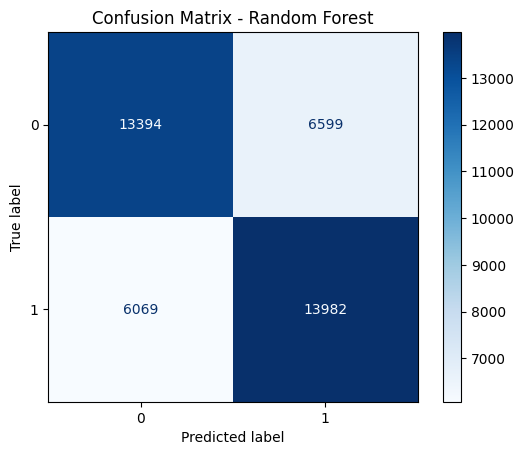


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68     19993
           1       0.68      0.70      0.69     20051

    accuracy                           0.68     40044
   macro avg       0.68      0.68      0.68     40044
weighted avg       0.68      0.68      0.68     40044



In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Muat data
df = pd.read_csv("fraud_detection_train.csv")  # sesuaikan path jika perlu
X = df.drop(columns=['label', 'visit_id'])
y = df['label']

# Encoding untuk kolom object
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Split data untuk Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Model Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

# Cross-validation evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
scoring = ['precision', 'recall', 'f1', 'accuracy']
rf_score = cross_validate(rf_model, X, y, scoring=scoring, cv=cv, n_jobs=-1)

# Tampilkan skor cross-validation
rf_results = pd.DataFrame({
    'Precision': rf_score['test_precision'],
    'Recall': rf_score['test_recall'],
    'F1-Score': rf_score['test_f1'],
    'Accuracy': rf_score['test_accuracy']
})
rf_results.loc['Rata-rata'] = rf_results.mean()

print("\n📊 Skor Cross-Validation:")
print(rf_results)

# Fit model dan prediksi untuk confusion matrix
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


In [54]:
!pip install python-docx

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.8 MB 882.6 kB/s eta 0:00:04
   ----- ---------------------------------- 0.5/3.8 MB 882.6 kB/s eta 0:00:04
   ----- ---------------------------------- 0.5/3.8 MB 882.6 kB/s eta 0:00:04
   -------- ------------------------------- 0.8/3.8 MB 729.2 kB/s eta 0:00:05
   -------- ------------------------------- 0.8/3.8 MB 729.2 kB/s eta 0:00:05
   ---------- ----------------------------- 1.0/3.8 MB 680.3 kB/s eta 0:00:05
   ---------- ----------------------------- 1.0/3.8 MB 680.3 kB/s eta 0:00:05
   ------------- -------------------------- 1.3/3.8 MB 657.8 kB/s eta 0:00:04
   ------------- -------------------------- 1.3/3.8 MB 657.8 kB/s eta 0:00:04
   ---------------- --


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder
from docx import Document

# Muat dataset
df = pd.read_csv("fraud_detection_train.csv")  # ganti path jika perlu
X = df.drop(columns=['label', 'visit_id'])
y = df['label']

# Label Encoding
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Model dan evaluasi
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
scoring = ['precision', 'recall', 'f1', 'accuracy']
results = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1)

# Buat DataFrame
df_results = pd.DataFrame({
    'Precision': results['test_precision'],
    'Recall': results['test_recall'],
    'F1-Score': results['test_f1'],
    'Accuracy': results['test_accuracy']
})
df_results.loc['Rata-rata'] = df_results.mean()

# Buat file Word
doc = Document()
doc.add_heading("Hasil Evaluasi Model Random Forest", level=1)
doc.add_paragraph(
    "Tabel berikut menyajikan hasil evaluasi model Random Forest berdasarkan metrik precision, recall, f1-score, dan accuracy "
    "menggunakan metode Repeated Stratified K-Fold Cross Validation sebanyak 10 kali. Baris terakhir menyajikan nilai rata-rata dari masing-masing metrik."
)

table = doc.add_table(rows=1, cols=len(df_results.columns) + 1)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Fold'
for i, col in enumerate(df_results.columns):
    hdr_cells[i + 1].text = col

for i, row in df_results.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = str(i)
    for j, val in enumerate(row):
        row_cells[j + 1].text = f"{val:.4f}"

doc.save("Hasil_Evaluasi_Random_Forest.docx")


In [58]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Hasil Evaluasi Model XGBoost:
           Precision    Recall  F1-Score  Accuracy
0           0.702780  0.721111  0.711828  0.708069
1           0.703436  0.707646  0.705534  0.704653
2           0.699645  0.707496  0.703548  0.701885
3           0.698461  0.704105  0.701272  0.700065
4           0.699650  0.707745  0.703674  0.701960
5           0.699710  0.710738  0.705181  0.702858
6           0.703321  0.709740  0.706516  0.705177
7           0.701105  0.709042  0.705051  0.703381
8           0.700283  0.714777  0.707456  0.704429
9           0.699179  0.709291  0.704199  0.702060
Rata-rata   0.700757  0.710169  0.705426  0.703454


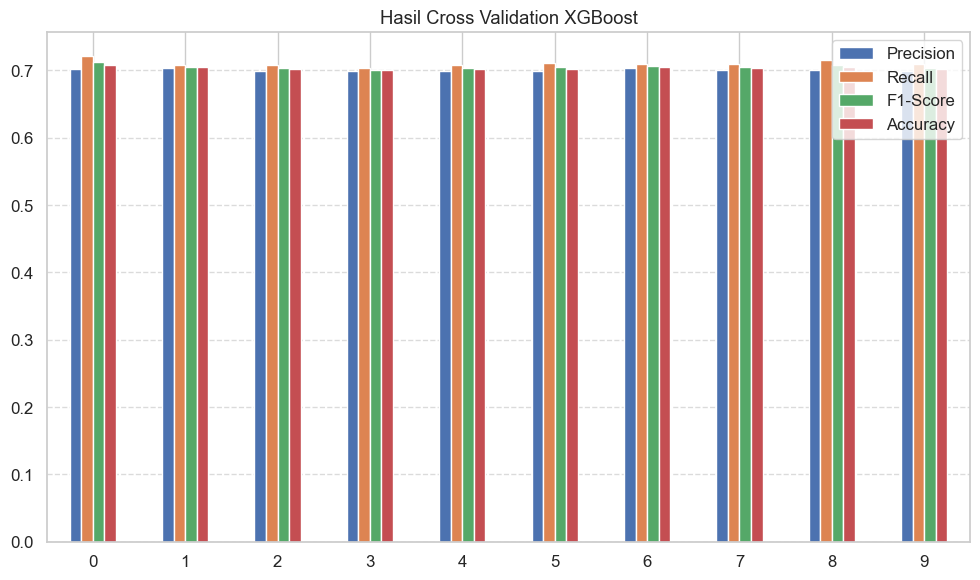

In [59]:
# Import library
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("fraud_detection_train.csv")  # Ganti path jika perlu

# 2. Siapkan fitur dan label
X = df.drop(columns=['label', 'visit_id'])  # hapus kolom yang tidak relevan
y = df['label']

# 3. Label Encoding untuk fitur kategorikal
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 4. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. SMOTE (Synthetic Minority Oversampling)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 6. Inisialisasi model XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 7. Setup evaluasi cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
scoring = ['precision', 'recall', 'f1', 'accuracy']

# 8. Evaluasi model
score = cross_validate(xgb_model, X_resampled, y_resampled,
                       scoring=scoring, cv=cv, n_jobs=-1)

# 9. Hasil ke DataFrame
results = pd.DataFrame({
    'Precision': score['test_precision'],
    'Recall': score['test_recall'],
    'F1-Score': score['test_f1'],
    'Accuracy': score['test_accuracy']
})
results.loc['Rata-rata'] = results.mean()

# 10. Tampilkan hasil evaluasi
print("Hasil Evaluasi Model XGBoost:")
print(results)

# 11. Visualisasi skor evaluasi
results.iloc[:-1].plot(kind='bar', figsize=(10, 6), title="Hasil Cross Validation XGBoost")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


📊 Hasil Evaluasi Model XGBoost:
           Precision    Recall  F1-Score  Accuracy
0           0.702780  0.721111  0.711828  0.708069
1           0.703436  0.707646  0.705534  0.704653
2           0.699645  0.707496  0.703548  0.701885
3           0.698461  0.704105  0.701272  0.700065
4           0.699650  0.707745  0.703674  0.701960
5           0.699710  0.710738  0.705181  0.702858
6           0.703321  0.709740  0.706516  0.705177
7           0.701105  0.709042  0.705051  0.703381
8           0.700283  0.714777  0.707456  0.704429
9           0.699179  0.709291  0.704199  0.702060
Rata-rata   0.700757  0.710169  0.705426  0.703454


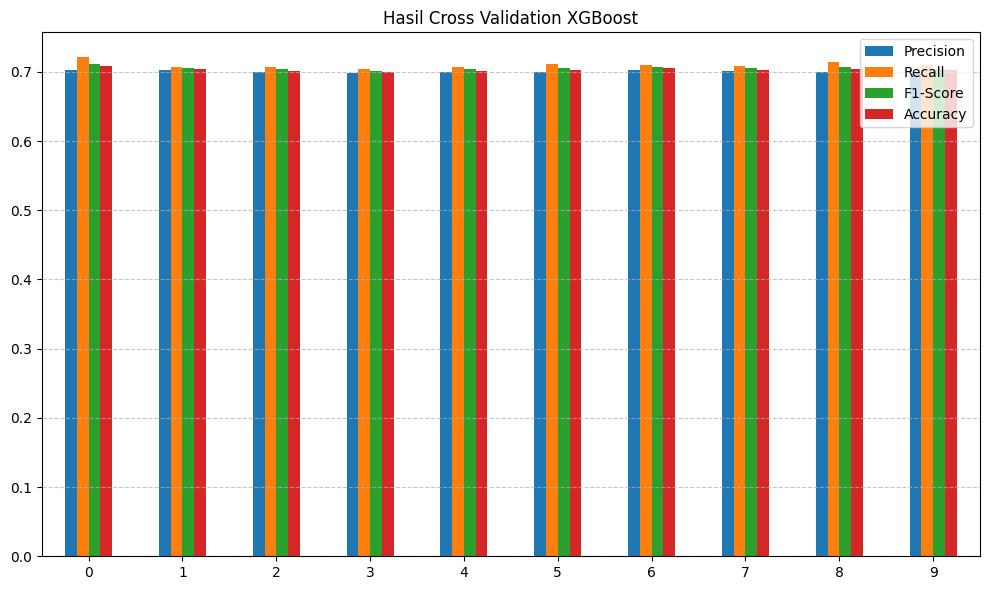

C:\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:07:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


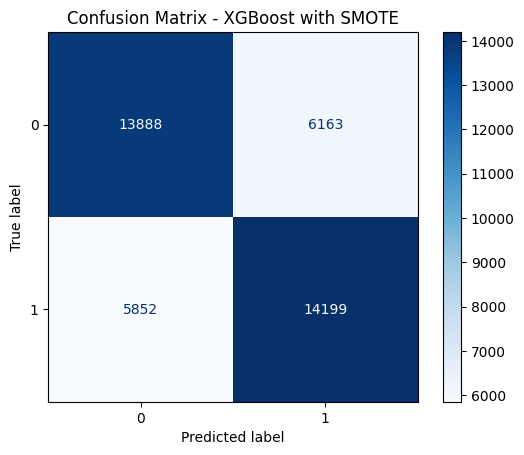

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70     20051
           1       0.70      0.71      0.70     20051

    accuracy                           0.70     40102
   macro avg       0.70      0.70      0.70     40102
weighted avg       0.70      0.70      0.70     40102



In [2]:
# Import library
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("fraud_detection_train.csv")  # Ganti path jika perlu

# 2. Siapkan fitur dan label
X = df.drop(columns=['label', 'visit_id'])  # hapus kolom yang tidak relevan
y = df['label']

# 3. Label Encoding untuk fitur kategorikal
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 4. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. SMOTE (Synthetic Minority Oversampling)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 6. Inisialisasi model XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 7. Setup evaluasi cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
scoring = ['precision', 'recall', 'f1', 'accuracy']

# 8. Evaluasi cross-validation
score = cross_validate(xgb_model, X_resampled, y_resampled,
                       scoring=scoring, cv=cv, n_jobs=-1)

# 9. Hasil evaluasi ke DataFrame
results = pd.DataFrame({
    'Precision': score['test_precision'],
    'Recall': score['test_recall'],
    'F1-Score': score['test_f1'],
    'Accuracy': score['test_accuracy']
})
results.loc['Rata-rata'] = results.mean()

# 10. Tampilkan hasil evaluasi
print("📊 Hasil Evaluasi Model XGBoost:")
print(results)

# 11. Visualisasi skor evaluasi
results.iloc[:-1].plot(kind='bar', figsize=(10, 6), title="Hasil Cross Validation XGBoost")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# =======================
# Tambahan: Confusion Matrix
# =======================

# 12. Train-test split untuk Confusion Matrix
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 13. Latih model
xgb_model.fit(X_train, y_train)

# 14. Prediksi dan Confusion Matrix
y_pred = xgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost with SMOTE")
plt.grid(False)
plt.show()

# 15. Classification Report
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Hasil evaluasi disimpan ke 'hasil_evaluasi_xgboost.xlsx'
✅ Gambar confusion matrix disimpan ke 'confusion_matrix_xgboost.png'


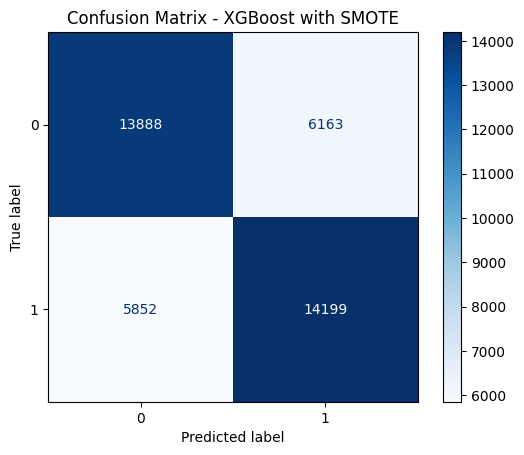

In [3]:
# 16. Simpan DataFrame hasil cross-validation ke Excel
results.to_excel("hasil_evaluasi_xgboost.xlsx", index=True)
print("✅ Hasil evaluasi disimpan ke 'hasil_evaluasi_xgboost.xlsx'")

# 17. Simpan gambar Confusion Matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix - XGBoost with SMOTE")
plt.grid(False)
plt.savefig("confusion_matrix_xgboost.png", dpi=300, bbox_inches='tight')
print("✅ Gambar confusion matrix disimpan ke 'confusion_matrix_xgboost.png'")



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Hasil Evaluasi Logistic Regression:
           Precision    Recall  F1-Score  Accuracy
0           0.559425  0.597676  0.577918  0.563488
1           0.560307  0.586155  0.572940  0.563089
2           0.562503  0.592240  0.576988  0.565807
3           0.557539  0.584011  0.570468  0.560271
4           0.556093  0.590594  0.572824  0.559573
5           0.559509  0.592938  0.575738  0.563064
6           0.557285  0.583911  0.570287  0.560022
7           0.561076  0.598125  0.579008  0.565109
8           0.559012  0.587951  0.573116  0.562067
9           0.558469  0.586405  0.572096  0.561393
Rata-rata   0.559122  0.590000  0.574139  0.562388


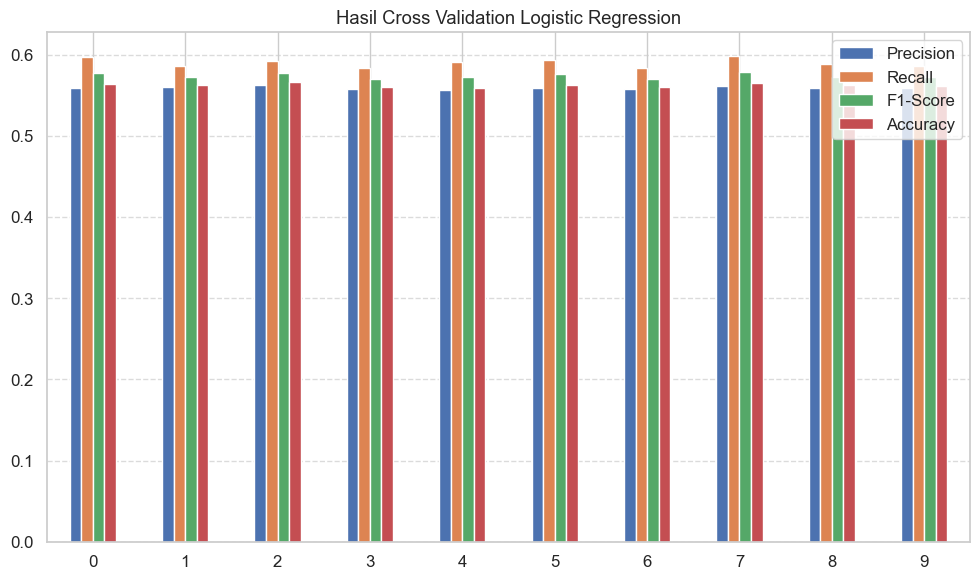

In [60]:
# Install library yang dibutuhkan
!pip install imbalanced-learn

# Import library
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("fraud_detection_train.csv")  # Ganti path jika perlu
X = df.drop(columns=['label', 'visit_id'])
y = df['label']

# 2. Encode kolom kategorikal
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 3. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Balancing data dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 5. Inisialisasi model Logistic Regression
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# 6. Cross-validation setup
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
scoring = ['precision', 'recall', 'f1', 'accuracy']

# 7. Evaluasi model
lr_score = cross_validate(lr_model, X_resampled, y_resampled,
                          scoring=scoring, cv=cv, n_jobs=-1)

# 8. Simpan hasil ke DataFrame
lr_results = pd.DataFrame({
    'Precision': lr_score['test_precision'],
    'Recall': lr_score['test_recall'],
    'F1-Score': lr_score['test_f1'],
    'Accuracy': lr_score['test_accuracy']
})
lr_results.loc['Rata-rata'] = lr_results.mean()

# 9. Tampilkan hasil
print("Hasil Evaluasi Logistic Regression:")
print(lr_results)

# 10. Visualisasi
lr_results.iloc[:-1].plot(kind='bar', figsize=(10, 6), title="Hasil Cross Validation Logistic Regression")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [57]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder

# Muat data
df = pd.read_csv("fraud_detection_train.csv")
X = df.drop(columns=['label', 'visit_id'])
y = df['label']

# Label Encoding untuk kolom kategorikal
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Model Logistic Regression
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=42)
scoring = ['precision', 'recall', 'f1', 'accuracy']
lr_score = cross_validate(lr_model, X, y, scoring=scoring, cv=cv, n_jobs=-1)

# Hasil evaluasi
lr_results = pd.DataFrame({
    'Precision': lr_score['test_precision'],
    'Recall': lr_score['test_recall'],
    'F1-Score': lr_score['test_f1'],
    'Accuracy': lr_score['test_accuracy']
})
lr_results.loc['Rata-rata'] = lr_results.mean()

# Tampilkan hasil
print(lr_results)


           Precision    Recall  F1-Score  Accuracy
0           0.560642  0.616896  0.587425  0.566077
1           0.560086  0.597347  0.578117  0.563430
2           0.555805  0.592559  0.573594  0.558835
3           0.554259  0.601636  0.576976  0.558236
4           0.558941  0.598245  0.577926  0.562431
5           0.559450  0.592319  0.575415  0.562331
6           0.554630  0.591421  0.572435  0.557637
7           0.555294  0.588030  0.571193  0.557914
8           0.554693  0.584738  0.569320  0.557015
9           0.555950  0.594214  0.574446  0.559163
10          0.558198  0.601735  0.579149  0.562082
11          0.555619  0.584879  0.569874  0.557886
12          0.554475  0.596948  0.574928  0.557986
13          0.549709  0.603331  0.575273  0.553891
14          0.555566  0.587373  0.571027  0.558086
15          0.556952  0.574564  0.565621  0.558136
16          0.560787  0.594015  0.576923  0.563780
17          0.557424  0.598404  0.577188  0.561011
18          0.555669  0.596409 

C:\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


('confusion_matrix_logistic_regression.png',
 'classification_report_logistic_regression.txt')

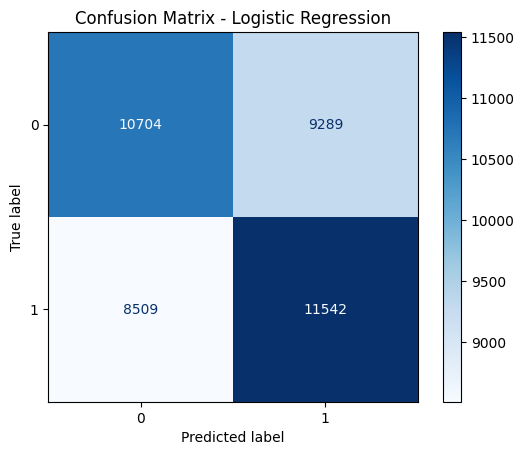

In [6]:
# Re-run semua proses akhir setelah reset untuk Logistic Regression
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("fraud_detection_train.csv")
X = df.drop(columns=['label', 'visit_id'])
y = df['label']

# Encoding kategorikal
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Latih model
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Simpan confusion matrix sebagai gambar
fig, ax = plt.subplots()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
conf_matrix_path = "confusion_matrix_logistic_regression.png"
plt.savefig(conf_matrix_path, dpi=300, bbox_inches='tight')

# Simpan classification report sebagai teks
report_text = classification_report(y_test, y_pred)
txt_path = "classification_report_logistic_regression.txt"
with open(txt_path, "w") as f:
    f.write(report_text)

conf_matrix_path, txt_path


In [41]:
from xgboost import XGBClassifier

 param = {
     'bootstrap': True,
     'max_depth': 50,
     'max_features': 6,
     'min_samples_leaf': 4,
     'min_samples_split': 12
 }

 xgb = XGBClassifier(random_state=42, **param)
 scoring = ['precision', 'recall', 'f1', 'accuracy']
 cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
 score = cross_validate(xgb, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)

 print(score)

IndentationError: unexpected indent (1275889632.py, line 3)

In [ ]:
from catboost import CatBoostClassifier

cat_features = [index for index, column in enumerate(X.columns) if X[column].dtype == "object"]
params = {
    "loss_function": "CrossEntropy",
    "eval_metric": "Precision",
    "random_seed": 42,
    "task_type": "CPU",
    "cat_features": cat_features,
    "early_stopping_rounds": 200,
    "iterations": 2000,
    "verbose": 100,
    "max_depth": 10,
}

cat = CatBoostClassifier(**params)
scoring = ['precision', 'recall', 'f1', 'accuracy']
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
score = cross_validate(cat, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)

print(score)

In [ ]:
avg_precision = score["test_precision"].mean()
avg_recall = score["test_recall"].mean()
avg_f1 = score["test_f1"].mean()
avg_accuracy = score["test_accuracy"].mean()
print("avg_precision", score["test_precision"].mean())
print("avg_recall", score["test_recall"].mean())
print("avg_f1", score["test_f1"].mean())
print("final_score", 0.4*avg_precision + 0.3*avg_recall + 0.3*avg_accuracy)

In [ ]:
import collections
from sklearn.model_selection import train_test_split

TRAIN_SIZE = 0.8
VAL_SIZE = 0.1
TEST_SIZE = 0.1

def train_val_test_split(X, y, train_size):
    """Split dataset into data splits."""
    X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, stratify=y_, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=X, y=y, train_size=TRAIN_SIZE)
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [ ]:
from catboost import CatBoostClassifier

cat_features = [index for index, column in enumerate(X_train.columns) if X_train[column].dtype == "object"]
params = {
    "loss_function": "CrossEntropy",
    "eval_metric": "Precision",
    "random_seed": 42,
    "task_type": "CPU",
    "cat_features": cat_features,
    "early_stopping_rounds": 200,
    "iterations": 2000,
    "verbose": 100,
    "max_depth": 8,
}

cat = CatBoostClassifier(**params)

In [ ]:
cat.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True, plot=True)

In [ ]:
y_pred = cat.predict(data=X_test)
print(classification_report(y_test, y_pred))

In [ ]:
for i, x in enumerate(list(X_train.columns)):
    print(x, cat.get_feature_importance()[i])

In [ ]:
#@title Feature Importances
import matplotlib.pyplot as plt
features = list(X_train.columns)

importances = cat.feature_import ances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Apply to Test Data

In [ ]:
import pandas as pd

In [ ]:
df_test = pd.read_csv("../input/bpjshackathon2021/pacilgo.ArtificalIntelligence.FraudDetectVal/Fraud Detection/fraud_detection_val.csv")

In [ ]:
df_test[(df_test.umur > 90)].shape

In [ ]:
new_imp = [x for x in imp if x!="label"]

In [ ]:
test = df_test[new_imp].copy()
test["los_log"] = np.log(test.los + 2)

In [ ]:
test2 = test.apply(lambda x: apply_row(x), axis=1)

In [ ]:
test2["count_proc"] = 0
for col in proc_cols:
    test2["count_proc"] += test2[col]

In [ ]:
test2["count_dx2"] = 0
for col in dx2_cols:
    test2["count_dx2"] += test2[col]

In [ ]:
test3 = test2.drop( drop_cols + proc_cols + dx2_cols, axis=1)

In [ ]:
test3 = test3.astype(astype_dict)

In [ ]:
y_pred = cat.predict(data=test3)

In [ ]:
sub = pd.DataFrame({"visit_id": df_test.visit_id, "predict_label": y_pred})
sub.head()

In [ ]:
sub.to_csv('submission.csv', index=False)

# Test 2 for data train 0.9

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, stratify=y, random_state=42)

In [ ]:
# from catboost import CatBoostClassifier

# cat_features = [index for index, column in enumerate(X_train.columns) if X_train[column].dtype == "object"]
# params = {
#     "loss_function": "CrossEntropy",
#     "eval_metric": "Precision",
#     "random_seed": 42,
#     "task_type": "CPU",
#     "cat_features": cat_features,
#     "early_stopping_rounds": 200,
#     "iterations": 2000,
#     "verbose": 100,
# }

# cat = CatBoostClassifier(**params)

In [ ]:
# cat.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True, plot=True)

In [ ]:
# y_pred = cat.predict(data=X_val)
# print(classification_report(y_val, y_pred))

In [ ]:
# X = df2.drop(["label", "los"] + proc_cols + dx2_cols, axis=1)
# y = df2.label.copy()

# # X = pd.get_dummies(X)

In [ ]:
# X = X.astype({"kdkc": "object", "dati2": "object", "encode_umur": "object", "severitylevel": "object"})

In [ ]:
# from catboost import CatBoostClassifier

# cat_features = [index for index, column in enumerate(X.columns) if X[column].dtype == "object"]
# params = {
#     "loss_function": "CrossEntropy",
#     "eval_metric": "F1",
#     "random_seed": 42,
#     "task_type": "CPU",
#     "cat_features": cat_features,
#     "early_stopping_rounds": 200,
#     "iterations": 1000,
#     "verbose": 100,
# }

# cat = CatBoostClassifier(**params)

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
# score = cross_val_score(cat, X, y, scoring="precision", cv=cv, n_jobs=-1)

# print(score)

## Preprocessing Data

In [ ]:
# Mengubah kategori menjadi numerik
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['typeppk', 'jkpst', 'cmg', 'diagprimer']
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Cek data setelah transformasi
df.head()

## Split Data untuk Training dan Testing

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['visit_id', 'label'])  # Drop ID yang tidak relevan
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek distribusi data
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

## Training Model Machine Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Support Vector Machine
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Evaluasi semua model
def evaluate_model(name, y_true, y_pred):
    print(f"=== {name} ===")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\n")

evaluate_model("SVM", y_test, svm_pred)
evaluate_model("XGBoost", y_test, xgb_pred)
evaluate_model("Logistic Regression", y_test, lr_pred)
